# Finding Heavy Traffic Indicators on I-94

In this project, we will be analyzing a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

Our dataset was made available by John Hogue and can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). The documentaion mentions that a station located approximately between Minneapolis and Saint Paul recorded the traffic data. Also, only traffic moving from east to west (westbound) were recorded.

The goal of our project is to determine possible indicators of heavy traffic on I-94. These indicators could range from weather type, time of day, time of the week, etc.

Our data set is descibed as follows:
- `holiday` - Categorical US National holidays plus regional holiday, Minnesota State Fair
- `temp` - Numeric Average temp in kelvin
- `rain_1h` - Numeric Amount in mm of rain that occurred in the hour
- `snow_1h` - Numeric Amount in mm of snow that occurred in the hour
- `clouds_all` - Numeric Percentage of cloud cover
- `weather_main` - Categorical Short textual description of the current weather
- `weather_description` - Categorical Longer textual description of the current weather
- `date_time` - DateTime Hour of the data collected in local CST time
- `traffic_volume` - Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [1]:
#Imports the pandas library
import pandas as pd

#Reads our CSV file
our_df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

#displays the first 5 rows of our dataframe
our_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
#displays the last 5 rows of our dataframe
our_df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
#Gives us a general idea of the number of rows, columns and the data type our columns have.
our_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We can see from above that our data set has a total of **48,204 rows** and **9 columns**. Each row describes the traffic for a particular hour starting from **2012-10-02 09:00:00** until **2018-09-30 23:00:00**.

## Analyzing Traffic Volume

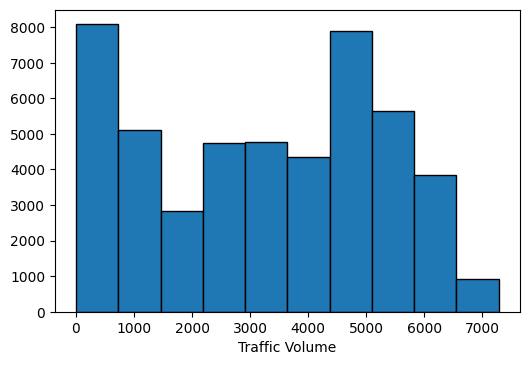

In [4]:
#Imports matplotlib library that generates our graphs
import matplotlib.pyplot as plt
%matplotlib inline

#Creates a Histogram for our Traffic Volume column
plt.hist(our_df['traffic_volume'], edgecolor='black')
plt.xlabel('Traffic Volume')
plt.show()

In [5]:
our_df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 until 2018-09-30 23:00:0, the traffic volume ranged in between **0** to **7,280**, with an average of **3,260**.

Around 25% of the time there were only **1,193** or less cars passing through, and 75% of the time there were **4,933** or more cars. This shows us that there are certain times of the day that the traffic volume fluctuates. Knowing this let us compare the traffic volume between *Day* and *Night*.

## Traffic Volume: Day vs Night

We will start by dividing our dataset into 2 parts:
- `Daytime data` - from 7:00 AM to 7:00 PM
- `Nighttime data` - from 7:00 PM to 7:00 AM

In [6]:
#Converts our date_time column to datetime type
our_df['date_time'] = pd.to_datetime(our_df['date_time'])

#Isolates the daytime data
daytime = our_df[(our_df['date_time'].dt.hour >= 7) & (our_df['date_time'].dt.hour < 19)]
print(daytime.shape)

(23877, 9)


Our daytime data has a total of **23,877** entries.

In [7]:
#Isolates the nighttime data
nighttime = our_df[(our_df['date_time'].dt.hour >= 19) | (our_df['date_time'].dt.hour < 7)]
print(nighttime.shape)

(24327, 9)


Our nighttime data has a total of **24,327** entries.

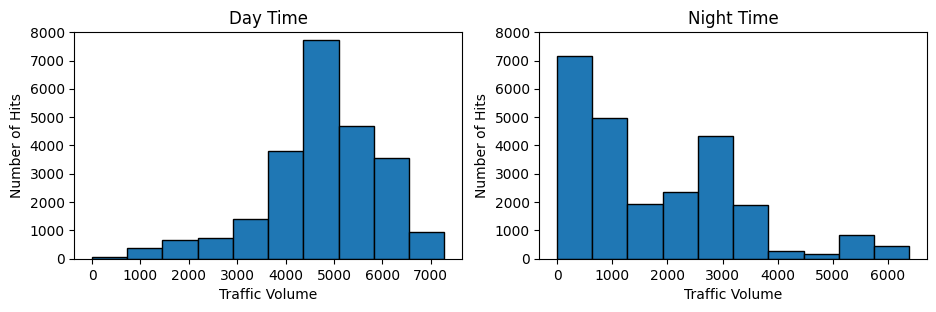

In [8]:
plt.figure(figsize=(11, 3))

#Plots our daytime histogram
plt.subplot(1, 2, 1)
plt.hist(daytime['traffic_volume'], edgecolor='black')
plt.title('Day Time')
plt.xlabel('Traffic Volume')
plt.ylabel('Number of Hits')
plt.ylim(0, 8000)

#Plots our nighttime histogram
plt.subplot(1, 2, 2)
plt.hist(nighttime['traffic_volume'], edgecolor='black')
plt.title('Night Time')
plt.xlabel('Traffic Volume')
plt.ylabel('Number of Hits')
plt.ylim(0, 8000)

plt.show()

In [9]:
print (daytime['traffic_volume'].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


In [10]:
print (nighttime['traffic_volume'].describe())

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


Our Day Time histogram shows a symmetrical normal distribution. Where most values are piled up in the middle of the range. The mean of our daytime histogram is **4,762**, 25% of that values are either **4,252** or below, and 75% of the values are either **5,559** or above.

Our Night Time histogram shows a right skewed distribution. Where our mean value is **1,785**, 25% of values are either **530** or below, and 75% of the values are either **2,819** or above.

By comparing both our histograms we can see that there is significantly less traffic during night time compared to day time. Inline with this, since the goal of our analysis is to determine heavy traffic indicators, we are going to focus on day time data moving forward.

## Time Indicators

It is possible that time is a heavy traffic inidicator, there could be heavier traffic in a particular monty, particular year, or a particular time of day.

<ipython-input-11-873f13ddbf3f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



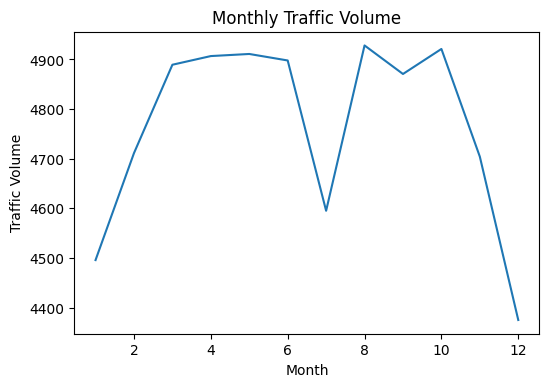

In [11]:
#Creates the a new column on our daytime dataset that indicates what month the row is from
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()

#Plots a line graph
by_month['traffic_volume'].plot.line()
plt.title('Monthly Traffic Volume')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()

By looking at our line graph, we can see that the traffic volume is low during January, and gradually becomes heavy from until March. This heavy traffic is constant until June, but we get a sharp decline in volume on the month of July.The heavy traffic then returns on August and stays until October, where we then hit an all time low on December.

Based on our data we can see that generally the traffic volume is much heavier during warm months compared to cold months. With the exception of July. Let us take a look at what exactly happened on July.

<ipython-input-12-28149b8faef1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



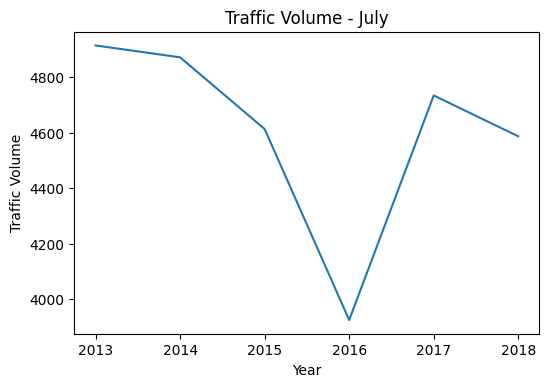

In [12]:
daytime['year'] = daytime['date_time'].dt.year
july_data = daytime[daytime['month'] == 7]
july_years = july_data.groupby('year').mean()

plt.plot(july_years['traffic_volume'])
plt.title('Traffic Volume - July')
plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.show()

By looking our graph above, we can conclude that generally traffic volume during July is high except for the year of 2016. By doing a bit of research we found [news](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) that the highway was undergoing construction on July of 2016 which explains the decline of traffic volume on July on our previous graph.

With this in mind, we can stick to our conclusion that there is heavier traffic volume during warm months. 

<ipython-input-13-3734bcc1343b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



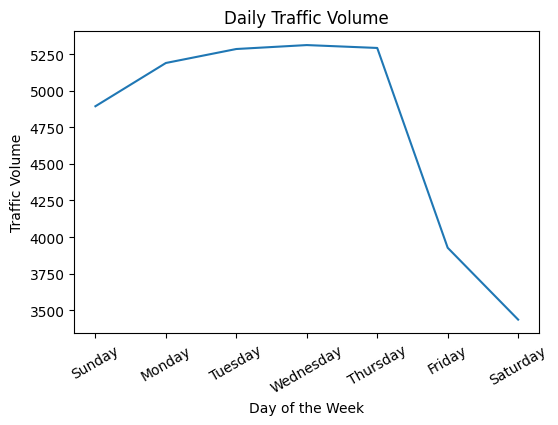

In [13]:
#Creates the a new column on our daytime dataset that indicates what day of the week the row is from
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()

#Plots a line graph
plt.plot(by_dayofweek['traffic_volume'])
plt.title('Daily Traffic Volume')
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Volume')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=30)
plt.show()

By observing our graph above, we can see that traffic volume is heavy from Sunday to Thursday, then generally declines on Friday, and finally hits an all time low during Satuday. With this, we can conclude that traffic volume is heavier during the weekdays compared to the weekends.

We will now generate a line graph for the time of day. But since the average is going to be heavily weighed down by weekend values, we will plot weekdays and weekends seperately.

<ipython-input-14-fe1f62f5a5e4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



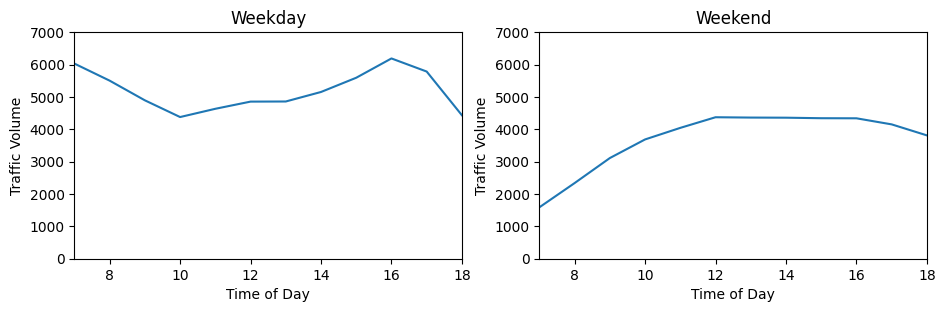

In [14]:
#Seperates daytime weekdays from weekends
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(11, 3))

#Plots the Weekday Line Graph
plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Weekday')
plt.xlabel('Time of Day')
plt.ylabel('Traffic Volume')
plt.xlim(7, 18)
plt.ylim(0, 7000)

#Plots the Weekday Line Graph
plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Weekend')
plt.xlabel('Time of Day')
plt.ylabel('Traffic Volume')
plt.xlim(7, 18)
plt.ylim(0, 7000)
plt.show()

By analyzing our graphs above, we can see that during the weekdays rush hour is at both 7:00 AM and 4:00 PM. During weekends, the traffing voime at 7:00 AM is low, and is almost always constant from 10:00 AM to 6:00PM.

By summarizing all the time indicators that we analyzed, we can conclude the following:
- The traffic volume is heavier during the warm month (March - October) compared to cold months (November - February).
- The traffic volume is heavier during a weekday compared to the weekends.
- On weekdays, rush is around 7:00AM and 4:00 PM

## Weather Indicators

Another possible traffic indicator is weather, we will use these columns and see their correlation to `traffic_volume`: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

In [15]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

`temp` has the strongest correlation with `traffic volume`, other weather columns like `rain_1h`, `snow_1h` and `clouds_all` does not show a strong correlation.

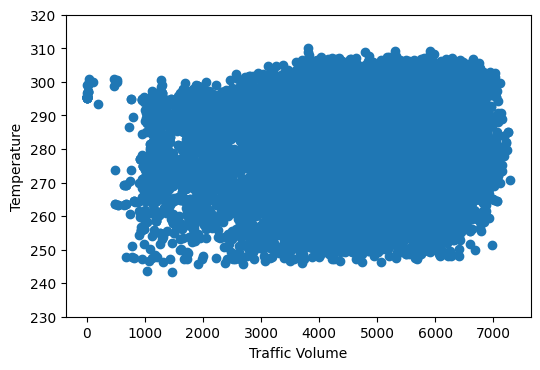

In [16]:
plt.scatter(daytime['traffic_volume'], daytime['temp'])
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

Looking at our graph above, we can't really classify temperature as a solid traffic indicator.

Let us look on the last 2 weather related columns: `weather_main` and `weather_description`.

## Weather Types

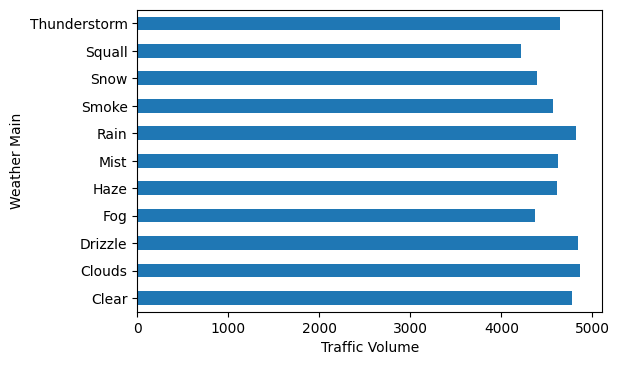

In [17]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

by_weather_main['traffic_volume'].plot.barh()
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Main')
plt.show()

The difference of the values in our graph above is so minimal that we can rule it out from being heavy traffic indicators

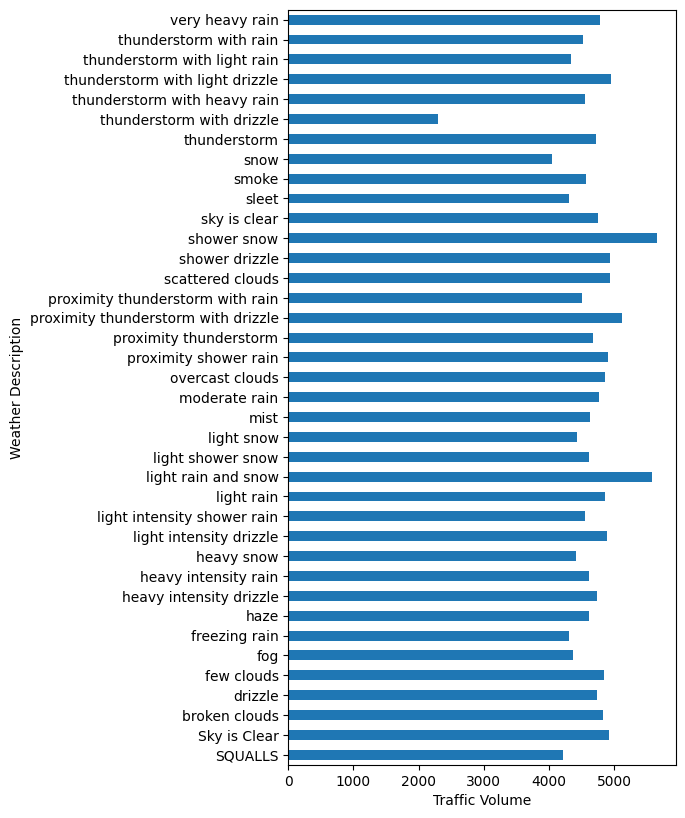

In [19]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.xlabel('Traffic Volume')
plt.ylabel('Weather Description')
plt.show()

Analyzing our graph above shows us that heavy traffic volume exceeds 5000 when the following are present:
- Light rain and snow
- Proximity thunderstorm with drizzle
- Shower snow

## Conclusion

With all our analysis on this project we have arrived to the following as heavy traffic indicators:
- As per time:
     - 